## Unsupervised Learning and Feature Selection/Transformation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from warnings import filterwarnings
filterwarnings('ignore')
# Loadind the required modules to read the data 
import pandas as pd
import numpy as np
from sklearn import mixture

import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)  # TO set print options to suppress scientific notations

In [2]:
data= pd.read_csv("sgemm_product.csv")
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [3]:
data["Avg_Run"]=data[["Run1 (ms)","Run2 (ms)","Run3 (ms)","Run4 (ms)"]].mean(axis=1)
data=data.drop(columns=["Run1 (ms)","Run2 (ms)","Run3 (ms)","Run4 (ms)"],axis=1)
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Avg_Run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


In [4]:
data["Class"]= np.where(data["Avg_Run"]>np.median(data["Avg_Run"]),1,0)
data_label=data["Class"]
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Avg_Run,Class
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700,1
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050,1
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650,1
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375,1
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625,1


In [5]:
from sklearn.model_selection import train_test_split

def data_part(X, y, split_size) :
    
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size = split_size)
    print(X_train.shape)
    print(X_test.shape)
    
    return X_train, X_test, y_train, y_test

In [6]:
def missing_check(data):
    missing_values = data.isnull().sum().sort_values(ascending = False)
    percentage_missing_values = (missing_values/len(data))*100
    print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing']))

In [7]:
missing_check(data)

         Missing values  % Missing
Class                 0        0.0
Avg_Run               0        0.0
SB                    0        0.0
SA                    0        0.0
STRN                  0        0.0
STRM                  0        0.0
VWN                   0        0.0
VWM                   0        0.0
KWI                   0        0.0
NDIMB                 0        0.0
MDIMA                 0        0.0
NDIMC                 0        0.0
MDIMC                 0        0.0
KWG                   0        0.0
NWG                   0        0.0
MWG                   0        0.0


In [8]:
Y=data["Class"]
data=data.drop("Avg_Run",axis=1)
data.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Class
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,0.499996
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,0.500001
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,0.000000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
X=data.drop("Class",axis=1)
y=data["Class"]

In [10]:
X_train, X_test, y_train, y_test=data_part(X,y,split_size=0.2)

(193280, 14)
(48320, 14)


In [11]:
X.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000


## TASK I : K-Means and Soft Clustering

In [73]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,random_state=42).fit(X)
    sse[k] = kmeans.inertia_ #a Inertia: Sum of distances of samples to their closest cluster center


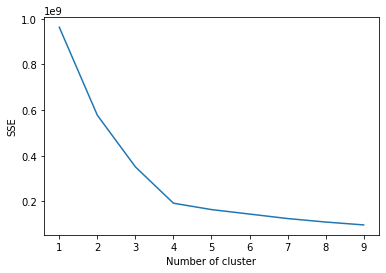

In [74]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [75]:
trace0=go.Scatter(type="scatter",
                   x=list(sse.keys()),
                  y=list(sse.values()))

data=[trace0]

layout = go.Layout(title = 'Number of Clusters Vs SSE ',xaxis=dict(title= 'Number of Clusters'),
                   yaxis=dict(title= 'SSE'))

    
fig = go.Figure(data=data, layout=layout)    
iplot(fig)

In [76]:
clusters=pd.DataFrame()
kmeans_object = KMeans(n_clusters=4,random_state=1234)
kmeans_object.fit(X)
kmeans_clusters = kmeans_object.predict(X)
clusters = kmeans.labels_
kmeans_result = pd.DataFrame({"labels":data_label,
                              "kmeans_cluster":kmeans_clusters})
kmeans_result.head()

,labels,kmeans_cluster
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [77]:
kmeans_object.cluster_centers_

array([[128.        , 128.        ,  25.61986036,  14.61598138,
         14.61598138,  18.83630721,  18.83630721,   5.        ,
          3.17300233,   3.17300233,   0.5       ,   0.5       ,
          0.5       ,   0.5       ],
       [ 46.911188  ,  46.911188  ,  25.41176471,  13.4532872 ,
         13.4532872 ,  16.35986159,  16.35986159,   5.        ,
          1.93656286,   1.93656286,   0.5       ,   0.5       ,
          0.5       ,   0.5       ],
       [128.        ,  46.93333333,  25.54754098,  14.72786885,
         13.35081967,  18.59672131,  16.55081967,   5.        ,
          3.17868852,   1.93606557,   0.5       ,   0.5       ,
          0.5       ,   0.5       ],
       [ 46.93333333, 128.        ,  25.54754098,  13.35081967,
         14.72786885,  16.55081967,  18.59672131,   5.        ,
          1.93606557,   3.17868852,   0.5       ,   0.5       ,
          0.5       ,   0.5       ]])

In [19]:
bic=[]
aic=[]
score=[]
for n in range(1,6):
    gmm_object=mixture.GaussianMixture(n,random_state=1234).fit(X) 
    gmm_clusters=gmm_object.predict(X)
    bic.append(gmm_object.bic(X))
    aic.append(gmm_object.aic(X))
    score.append(gmm_object.score(X))

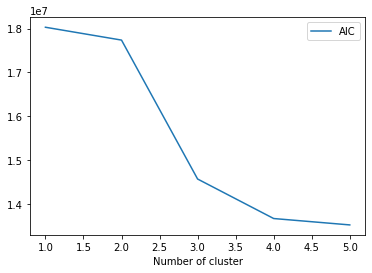

In [21]:
plt.figure()
plt.plot(list(range(1,6)),aic,label="AIC")
plt.xlabel("Number of cluster")
plt.legend(loc='best')
plt.show()

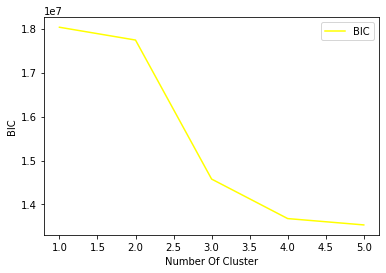

In [28]:
plt.figure()
plt.plot(list(range(1,6)),bic,label="BIC",color="yellow")
plt.xlabel("Number Of Cluster")
plt.ylabel("BIC")
plt.legend(loc='best')
plt.show()

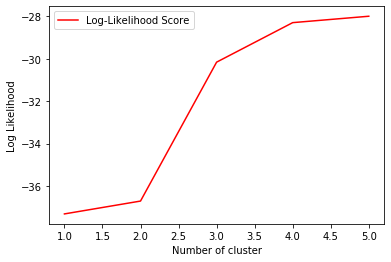

In [27]:
plt.figure()
plt.plot(list(range(1,6)),score,label="Log-Likelihood Score",color="red")
plt.xlabel("Number of cluster")
plt.ylabel("Log Likelihood")
plt.legend(loc='best')
plt.show()

## TASK II- Feature Selection and Feature Transformation

In [29]:
# feature selection through decision tree
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
import pandas as pd
feature_importance = pd.DataFrame({'Feature':X.columns, 'Score':DT.feature_importances_})
print(feature_importance.sort_values('Score', ascending = False))

   Feature     Score
0      MWG  0.270346
1      NWG  0.170401
3    MDIMC  0.151888
4    NDIMC  0.151383
12      SA  0.053365
10    STRM  0.043520
8      VWM  0.037745
13      SB  0.031200
9      VWN  0.026225
2      KWG  0.022044
6    NDIMB  0.011632
5    MDIMA  0.011544
11    STRN  0.009478
7      KWI  0.009229


In [32]:
X_Selected= X[["MWG","NWG","MDIMC","NDIMC"]]

In [87]:
from sklearn.cluster import KMeans
sse_x = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,random_state=42).fit(X)
    X_Selected["Clusters"] = kmeans.labels_
    sse_x[k] = kmeans.inertia_ #a Inertia: Sum of distances of samples to their closest cluster center


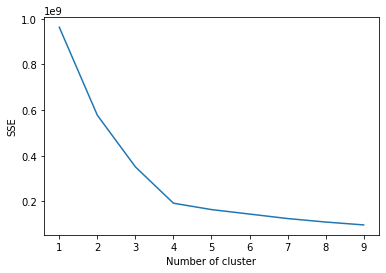

In [88]:
plt.figure()
plt.plot(list(sse_x.keys()), list(sse_x.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [89]:
trace0=go.Scatter(type="scatter",
                   x=list(sse_x.keys()),
                  y=list(sse_x.values()))

data=[trace0]

layout = go.Layout(title = 'Number of Clusters Vs SSE ',xaxis=dict(title= 'Number of Clusters'),
                   yaxis=dict(title= 'SSE'))

    
fig = go.Figure(data=data, layout=layout)    
iplot(fig)

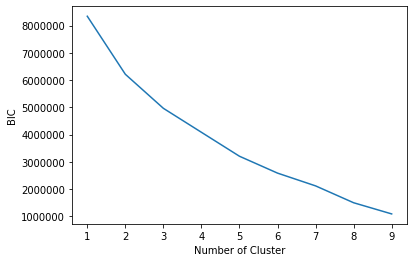

In [39]:
bic_DT=[]
for n in range(1,10):
    gmm_object_DT=mixture.GaussianMixture(n).fit(X_Selected) 
    gmm_clusters_DT=gmm_object_DT.predict(X_Selected)
    bic_DT.append(gmm_object_DT.bic(X_Selected))


    
plt.plot(list(range(1,10)),bic_DT,label="BIC on Selected Features")
plt.ylabel("BIC")
plt.xlabel("Number of Cluster")
plt.show()


In [34]:
X_train_DT,X_test_DT, y_train_DT, y_test_DT=data_part(X_Selected,Y,split_size=0.2)

(193280, 4)
(48320, 4)


In [35]:
NN_DT= MLPClassifier()
NN_DT.fit(X_train_DT,y_train_DT)
nn_tr_pred_DT= NN_DT.predict(X_train_DT)
nn_te_pred_DT= NN_DT.predict(X_test_DT)
training_acc_nn_DT= accuracy_score(y_train_DT,nn_tr_pred_DT)
testing_acc_nn_DT= accuracy_score(y_test_DT,nn_te_pred_DT)
print("Training Accuracy : Neural Network  Selected Features=",(training_acc_nn_DT)*100,"%")
print("Test Accuracy : Neural Network Selected Features =",(testing_acc_nn_DT)*100,"%")

Training Accuracy : Neural Network  Selected Features= 88.2460678807947 %
Test Accuracy : Neural Network Selected Features = 88.26779801324504 %


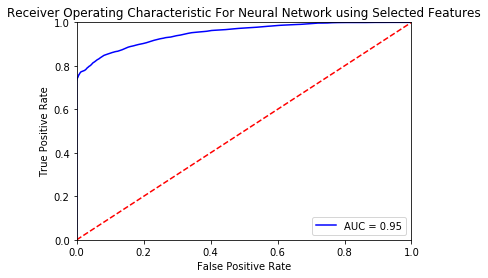

In [36]:
probs_NN_DT = NN_DT.predict_proba(X_test_DT)
preds_NN_DT = probs_NN_DT[:,1]
fpr_NN_DT, tpr_NN_DT, threshold_NN_DT = metrics.roc_curve(y_test_DT, preds_NN_DT)
roc_auc_NN_DT = metrics.auc(fpr_NN_DT, tpr_NN_DT)


plt.title('Receiver Operating Characteristic For Neural Network using Selected Features')
plt.plot(fpr_NN_DT, tpr_NN_DT, 'b', label = 'AUC = %0.2f' % roc_auc_NN_DT)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## TASK III and TASK IV : Applying Clustering and Neural Network on PCA,ICA and RCA

## PCA ,Clustering and Neural Network

In [90]:
# using PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [91]:
pca.explained_variance_ratio_

array([0.45364   , 0.45292865, 0.02528558, 0.02107742, 0.01728588,
       0.01712347, 0.00864408, 0.00225739, 0.00075387, 0.00075285,
       0.00006271, 0.00006271, 0.00006271, 0.00006271])

In [92]:
# as can be seen from above ratio top 2 companents explain 91% variance in data
new_pca = PCA(n_components = 2)
pca_transformed = new_pca.fit_transform(X)
new_pca.explained_variance_ratio_

array([0.45364   , 0.45292865])

In [93]:
pca_transformed

array([[ 91.74762997,  -0.        ],
       [ 91.74762997,   0.        ],
       [ 91.74762997,   0.        ],
       ...,
       [-68.59344307,  -0.        ],
       [-68.59344307,  -0.        ],
       [-68.59344307,  -0.        ]])

In [94]:
from sklearn.cluster import KMeans
sse_pca = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=1234).fit(pca_transformed)
    X["pca_clusters"] = kmeans.labels_
    sse_pca[k] = kmeans.inertia_ #a Inertia: Sum of distances of samples to their closest cluster center


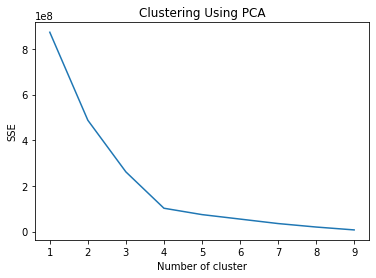

In [95]:
plt.figure()
plt.plot(list(sse_pca.keys()), list(sse_pca.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("Clustering Using PCA")
plt.show()

In [96]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca=data_part(pca_transformed,Y,split_size=0.3)

(169120, 2)
(72480, 2)


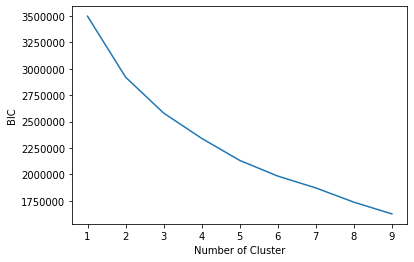

In [120]:
bic_tr_pca=[]
for n in range(1,10):
    gmm_object_pca=mixture.GaussianMixture(n).fit(X_train_pca) 
    gmm_clusters_pca=gmm_object_pca.predict(X_train_pca)
    bic_tr_pca.append(gmm_object_pca.bic(X_train_pca))


    
plt.plot(list(range(1,10)),bic_tr_pca,label="BIC Train")
plt.ylabel("BIC")
plt.xlabel("Number of Cluster")
plt.show()


In [99]:
NN_pca= MLPClassifier()
NN_pca.fit(X_train_pca,y_train_pca)
nn_tr_pred_pca= NN_pca.predict(X_train_pca)
nn_te_pred_pca= NN_pca.predict(X_test_pca)
training_acc_nn_pca= accuracy_score(y_train_pca,nn_tr_pred_pca)
testing_acc_nn_pca= accuracy_score(y_test_pca,nn_te_pred_pca)
print("Training Accuracy : Neural Network  PCA=",(training_acc_nn_pca)*100,"%")
print("Test Accuracy : Neural Network PCA =",(testing_acc_nn_pca)*100,"%")

Training Accuracy : Neural Network  PCA= 74.58786660359507 %
Test Accuracy : Neural Network PCA = 74.4812362030905 %


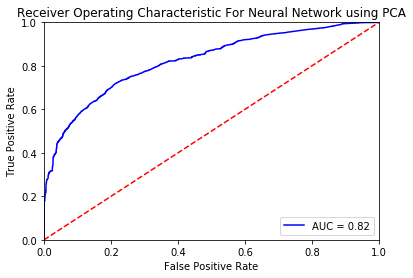

In [100]:
probs_NN_pca = NN_pca.predict_proba(X_test_pca)
preds_NN_pca = probs_NN_pca[:,1]
fpr_NN_pca, tpr_NN_pca, threshold_NN_pca = metrics.roc_curve(y_test_pca, preds_NN_pca)
roc_auc_NN_pca = metrics.auc(fpr_NN_pca, tpr_NN_pca)


plt.title('Receiver Operating Characteristic For Neural Network using PCA')
plt.plot(fpr_NN_pca, tpr_NN_pca, 'b', label = 'AUC = %0.2f' % roc_auc_NN_pca)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## ICA, Clustering and Neural Network

In [101]:
# using ICA to find out important dimmensions from the dataset
from sklearn.decomposition import FastICA

ica = FastICA()
kmeans = KMeans()

n_components = []
ica_clusters = []
scores_ica = []

for n in range(2,14):
    ica.set_params(n_components = n)
    X_ica = ica.fit_transform(X)
    for k in range(2,10):
        kmeans.set_params(n_clusters = k)
        kmeans.fit(X_ica)
        n_components.append(n)
        ica_clusters.append(k)
        scores_ica.append(kmeans.inertia_)

In [102]:
scores_vs_clust = pd.DataFrame({'n_components':n_components, 'n_clusters':ica_clusters, 'Scores':scores_ica})
print(scores_vs_clust.sort_values('Scores'))

    n_components  n_clusters     Scores
7              2           9   0.016482
6              2           8   0.045564
5              2           7   0.080199
4              2           6   0.124763
3              2           5   0.169600
..           ...         ...        ...
81            12           3  10.317057
90            13           4  10.789781
80            12           2  11.000000
89            13           3  11.317057
88            13           2  12.000000

[96 rows x 3 columns]


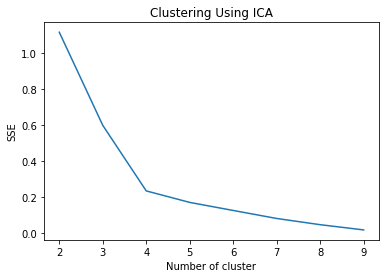

In [103]:
plt.plot((list(range(2,10))),scores_vs_clust[scores_vs_clust["n_components"]==2]["Scores"])
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("Clustering Using ICA")
plt.show()

In [104]:
ica=FastICA()
ica.set_params(n_components = 2)
X_ica_final = ica.fit_transform(X)
kmeans_ica = KMeans(n_clusters=4,random_state=1234)
kmeans_ica.fit(X_ica_final)
kmeans_clusters_ica = kmeans_ica.predict(X_ica_final)
kmeans_result_ica = pd.DataFrame({"labels":data_label,
                              "kmeans_cluster":kmeans_clusters_ica})
kmeans_result_ica.head()

,labels,kmeans_cluster
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [105]:
X_train_ica, X_test_ica, y_train_ica, y_test_ica=data_part(X_ica_final,Y,split_size=0.2)

(193280, 2)
(48320, 2)


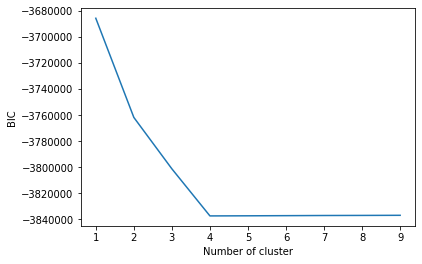

In [119]:
bic_tr_ica=[]
for n in range(1,10):
    gmm_object_ica=mixture.GaussianMixture(n).fit(X_train_ica) 
    gmm_clusters_ica=gmm_object_ica.predict(X_train_ica)
    bic_tr_ica.append(gmm_object_ica.bic(X_train_ica))


    
plt.plot(list(range(1,10)),bic_tr_ica,label="BIC Train")
plt.ylabel("BIC")
plt.xlabel("Number of cluster")
plt.show()


In [107]:
NN_ica= MLPClassifier()
NN_ica.fit(X_train_ica,y_train_ica)
nn_tr_pred_ica= NN_ica.predict(X_train_ica)
nn_te_pred_ica= NN_ica.predict(X_test_ica)
training_acc_nn_ica= accuracy_score(y_train_ica,nn_tr_pred_ica)
testing_acc_nn_ica= accuracy_score(y_test_ica,nn_te_pred_ica)
print("Training Accuracy : Neural Network ICA =",(training_acc_nn_ica)*100,"%")
print("Test Accuracy : Neural Network ICA =",(testing_acc_nn_ica)*100,"%")

Training Accuracy : Neural Network ICA = 72.81353476821192 %
Test Accuracy : Neural Network ICA = 72.77110927152319 %


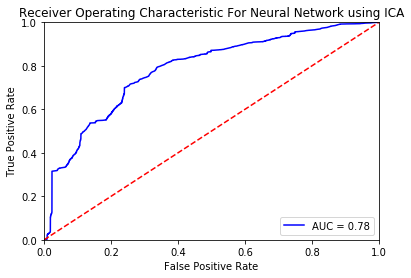

In [108]:
probs_NN_ica = NN_ica.predict_proba(X_test_ica)
preds_NN_ica = probs_NN_ica[:,1]
fpr_NN_ica, tpr_NN_ica, threshold_NN_ica = metrics.roc_curve(y_test_ica, preds_NN_ica)
roc_auc_NN_ica = metrics.auc(fpr_NN_ica, tpr_NN_ica)


plt.title('Receiver Operating Characteristic For Neural Network using ICA')
plt.plot(fpr_NN_ica, tpr_NN_ica, 'b', label = 'AUC = %0.2f' % roc_auc_NN_ica)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## RCA, Clustering and Neural Network

In [109]:
from sklearn.random_projection import GaussianRandomProjection

RCA = GaussianRandomProjection()
kmeans = KMeans()

n_comp_RCA = []
n_clust_RCA = []
Scores_RCA = []

for n in range(2,14):
    RCA.set_params(n_components = n)
    X_RCA = RCA.fit_transform(X)
    for k in range(2,10):
        kmeans.set_params(n_clusters = k)
        kmeans.fit(X_RCA)
        n_comp_RCA.append(n)
        n_clust_RCA.append(k)
        Scores_RCA.append(kmeans.inertia_)

In [110]:
scores_vs_clust_RCA = pd.DataFrame({'n_components':n_comp_RCA, 'n_clusters':n_clust_RCA, 'Scores':Scores_RCA})
print(scores_vs_clust_RCA.sort_values('Scores'))

    n_components  n_clusters        Scores
7              2           9  5.977940e+07
39             6           9  6.287716e+07
6              2           8  6.638855e+07
38             6           8  6.660526e+07
15             3           9  6.849586e+07
..           ...         ...           ...
24             5           2  4.511145e+08
56             9           2  4.628192e+08
48             8           2  5.401996e+08
88            13           2  5.546021e+08
64            10           2  6.776298e+08

[96 rows x 3 columns]


In [111]:
scores_vs_clust_RCA.groupby("n_components")["Scores"].mean().reset_index().sort_values("Scores")

,n_components,Scores
0,2,1.145052e+08
4,6,1.212790e+08
1,3,1.214722e+08
10,12,1.628894e+08
5,7,1.660213e+08
2,4,1.770413e+08
7,9,1.844584e+08
9,11,1.892498e+08
3,5,1.976273e+08
11,13,2.017016e+08


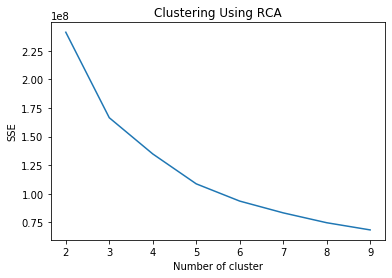

In [112]:
plt.plot((list(range(2,10))),scores_vs_clust_RCA[scores_vs_clust_RCA["n_components"]==3]["Scores"])
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("Clustering Using RCA")
plt.show()

In [115]:
RCA = GaussianRandomProjection()
RCA.set_params(n_components = 2)
X_rca_final = RCA.fit_transform(X)
kmeans_rca = KMeans(n_clusters=3,random_state=42)
kmeans_rca.fit(X_rca_final)
kmeans_clusters_rca = kmeans_rca.predict(X_rca_final)
kmeans_result_rca = pd.DataFrame({"labels":data_label,
                              "kmeans_cluster":kmeans_clusters_rca})
kmeans_result_rca.head()

,labels,kmeans_cluster
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [116]:
X_train_rca, X_test_rca, y_train_rca, y_test_rca=data_part(X_rca_final,Y,split_size=0.2)

(193280, 2)
(48320, 2)


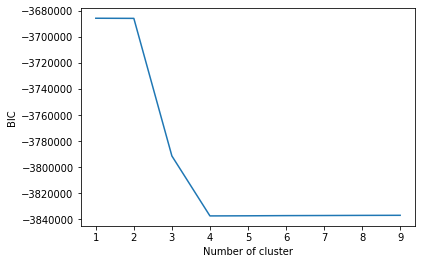

In [118]:
bic_tr_ica=[]
for n in range(1,10):
    gmm_object_ica=mixture.GaussianMixture(n).fit(X_train_ica) 
    gmm_clusters_ica=gmm_object_ica.predict(X_train_ica)
    bic_tr_ica.append(gmm_object_ica.bic(X_train_ica))


    
plt.plot(list(range(1,10)),bic_tr_ica,label="BIC Train")
plt.ylabel("BIC")
plt.xlabel("Number of cluster")
plt.show()


In [121]:
NN_rca= MLPClassifier()
NN_rca.fit(X_train_rca,y_train_rca)
nn_tr_pred_rca= NN_rca.predict(X_train_rca)
nn_te_pred_rca= NN_rca.predict(X_test_rca)
training_acc_nn_rca= accuracy_score(y_train_rca,nn_tr_pred_rca)
testing_acc_nn_rca= accuracy_score(y_test_rca,nn_te_pred_rca)

print("Training Accuracy : Neural Network RCA =",(training_acc_nn_rca)*100,"%")
print("Test Accuracy : Neural Network RCA =",(testing_acc_nn_rca)*100,"%")

Training Accuracy : Neural Network RCA = 75.94577814569536 %
Test Accuracy : Neural Network RCA = 75.7967715231788 %


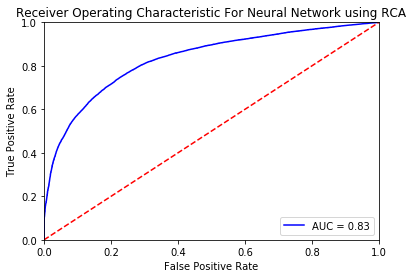

In [122]:
probs_NN_rca = NN_rca.predict_proba(X_test_rca)
preds_NN_rca = probs_NN_rca[:,1]
fpr_NN_rca, tpr_NN_rca, threshold_NN_rca = metrics.roc_curve(y_test_rca, preds_NN_rca)
roc_auc_NN_rca = metrics.auc(fpr_NN_rca, tpr_NN_rca)


plt.title('Receiver Operating Characteristic For Neural Network using RCA')
plt.plot(fpr_NN_rca, tpr_NN_rca, 'b', label = 'AUC = %0.2f' % roc_auc_NN_rca)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## TASK V : Neural Network Using Clusters as features

In [124]:
X_train_clust, X_test_clust, y_train_clust, y_test_clust=data_part(clusters,Y,split_size=0.2)

(193280,)
(48320,)


In [125]:
NN_clust= MLPClassifier()
NN_clust.fit(pd.DataFrame(X_train_clust),y_train_clust)
nn_tr_pred_clust= NN_clust.predict(pd.DataFrame(X_train_clust))
nn_te_pred_clust= NN_clust.predict(pd.DataFrame(X_test_clust))
training_acc_nn_clust= accuracy_score(y_train_clust,nn_tr_pred_clust)
testing_acc_nn_clust= accuracy_score(y_test_clust,nn_te_pred_clust)

In [127]:
print("Training Accuracy : Neural Network using Clusters as features =",(training_acc_nn_clust)*100,"%")
print("Test Accuracy : Neural Network using Clusters as features =",(testing_acc_nn_clust)*100,"%")

Training Accuracy : Neural Network using Clusters as features = 71.78807947019867 %
Test Accuracy : Neural Network using Clusters as features = 71.4466059602649 %


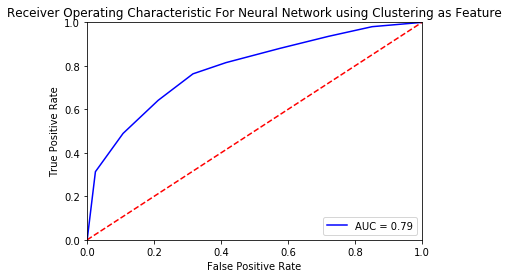

In [128]:
probs_NN_cl = NN_clust.predict_proba(pd.DataFrame(X_test_clust))
preds_NN_cl = probs_NN_cl[:,1]
fpr_NN_cl, tpr_NN_cl, threshold_NN_cl = metrics.roc_curve(y_test_clust, preds_NN_cl)
roc_auc_NN_cl = metrics.auc(fpr_NN_cl, tpr_NN_cl)


plt.title('Receiver Operating Characteristic For Neural Network using Clustering as Feature')
plt.plot(fpr_NN_cl, tpr_NN_cl, 'b', label = 'AUC = %0.2f' % roc_auc_NN_cl)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()